In [25]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES

## Import data

In [2]:
url = 'https://raw.githubusercontent.com/arofiqimaulana/dataset/master/iris.csv'
df = pd.read_csv(url)

In [3]:
df = df.sample(frac=1).reset_index(drop=True)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.7,3.0,4.2,1.2,1,versicolor
1,5.8,2.8,5.1,2.4,2,virginica
2,7.7,3.0,6.1,2.3,2,virginica
3,6.8,3.2,5.9,2.3,2,virginica
4,6.3,2.5,5.0,1.9,2,virginica


In [5]:
X = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]

## Normalisasi

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

## Clustering using k-Medoids

In [7]:
# Initialize initial medoids using K-Means++ algorithm
# number of clusters = 3
initial_medoids = kmeans_plusplus_initializer(scaled_features, 3).initialize(return_index=True)

In [8]:
# Create instance of K-Medoids (PAM) algorithm.
kmedoids_instance = kmedoids(scaled_features,initial_medoids)

In [11]:
# Run cluster analysis and obtain results.
kmedoids_instance.process()
medoids = kmedoids_instance.get_medoids()
clusters = kmedoids_instance.get_clusters()

In [ ]:
kmedoids_instance.

In [12]:
medoids

[110, 71, 123]

In [15]:
# reformating datasets 
ls_clusters = []
for k in range(len(clusters)):
    clusters_k = clusters[k]
    for j in clusters_k:
        ls_clusters.append([k,j])

df_clusters = pd.DataFrame(ls_clusters)
df_clusters.columns = ['clusters','object']
df_clusters.sort_values('object',ascending=True)
df_clusters.set_index('object',inplace=True)

In [18]:
df_clusters

,clusters
object,
1,0
2,0
3,0
5,0
6,0
...,...
135,2
136,2
140,2


In [19]:
X['clusters'] = df_clusters['clusters']

<ipython-input-19-fe2596b31186>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['clusters'] = df_clusters['clusters']


In [20]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.7,3.0,4.2,1.2,2
1,5.8,2.8,5.1,2.4,0
2,7.7,3.0,6.1,2.3,0
3,6.8,3.2,5.9,2.3,0
4,6.3,2.5,5.0,1.9,2
...,...,...,...,...,...
145,5.6,2.8,4.9,2.0,2
146,6.4,3.2,5.3,2.3,0
147,7.7,3.8,6.7,2.2,0
148,6.9,3.1,4.9,1.5,0


# Visualize using PCA
Visualisasi data paling mudah menggunakan grafik 2 dimensi. Karena kita punya lebih dari 2 variabel, maka kita bisa gunakan PCA untuk menjadikannya menjadi 2 variabel baru.

In [21]:
pca = PCA(2)

arr_pca = pca.fit_transform(X)

In [22]:
df_pca = pd.DataFrame(arr_pca)
df_pca.columns = ['PC1','PC2']
df_pca['labels'] = X['clusters'] 

In [23]:
df_pca

,PC1,PC2,labels
0,0.196551,1.013871,2
1,1.702722,-0.502762,0
2,3.188777,-0.821314,0
3,2.677047,-0.722084,0
4,1.380070,1.226943,2
...,...,...,...
145,1.053456,1.268395,2
146,2.023349,-0.744377,0
147,3.599520,-0.987644,0
148,1.589219,-0.929865,0


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

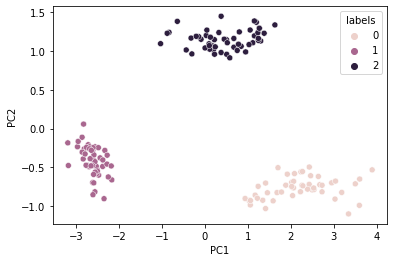

In [26]:
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="labels")

## Reference
- https://pyclustering.github.io/docs/0.10.1/html/d0/dd3/classpyclustering_1_1cluster_1_1kmedoids_1_1kmedoids.html